__X-HEC Data Science for Business MScT - Python for Data Science - 2022/2023__

Contacts:
- Mathurin Massias <mathurin.massias@gmail.com> (or use Slack)
- Sylvain Combettes <sylvain.combettes8@gmail.com> (or use Slack)

<font size="+3"><mark>Exploratory Data Analysis (EDA) on the California DSS dataset</mark></font>

<div class="alert alert-block alert-info">
    <b>READ ME</b>
    <ul>
        <li>This notebook serves as an introduction to Exploratory Data Analysis (EDA).</li>
        <ul>
            <li>EDA is about investigating your data to gain insights: discover patterns, spot anomalies, test hypothesis and check assumptions, using summary statistics and visualizations.</li>
            <li>This notebook shows the importance of EDA which can give a lot of insights on your data, thus how to best model it. <mark>Always perform EDA on your data right after loading it and before even trying to model it.</mark> EDA should be very useful for your RAMP Project.</li>
            <li>In this notebook, we will only analyze the data with visualizations, without modeling it.</li>
        </ul>
        <li>This notebook also serves as an introduction to some visualization libraries:
            <ul>
                <li><a href="https://seaborn.pydata.org/">seaborn</a>: <blockquote>Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.</blockquote></li>
                <li><a href="https://plotly.com/python/">plotly</a>: <blockquote>Plotly's Python graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.</blockquote>
            </ul>
        and an example usage of pandas and matplotlib.</li>
    </ul>
</div>

# Introduction

In the early 2000's, the California Department of Developmental Services (DDS), an agency which serves the developmentally-disabled population, has been accused of discrimination privileging the Whites non-Hispanic over the Hispanics.
We are going to use a dataset proposed by Stanley A. Taylor and Amy E. Mickel from the California State University, Sacramento.
They have been authorized to distribute a representative sample of the DDS expenditures that can be used to investigate
this discrimination claim.

Using EDA, we try to determine whether or not there is a discrimination privileging the Whites non-Hispanic over the Hispanics.

*Note that this notebook does not try to convey any political message.*


Imports:

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport

Configuration:

In [2]:
sns.set_theme()  # Apply the default theme of seaborn
plt.rcParams["figure.figsize"] = (10, 4)  # Set the figure size for all plots

# Loading the data

Let us load the data:

In [3]:
california = pd.read_csv('california_dss.csv')

and look quickly on its content:

In [4]:
california.head()

,ID,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13-17,17,Female,2113,White not Hispanic
1,10409,22-50,37,Male,41924,White not Hispanic
2,10486,0 - 5,3,Male,1454,Hispanic
3,10538,18-21,19,Female,6400,Hispanic
4,10568,13-17,13,Male,4412,White not Hispanic


In [5]:
california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1000 non-null   int64 
 1   Age Cohort    1000 non-null   object
 2   Age           1000 non-null   int64 
 3   Gender        1000 non-null   object
 4   Expenditures  1000 non-null   int64 
 5   Ethnicity     1000 non-null   object
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


We have a dataset of 1000 individuals characterized by their ID, their Age (and Age Cohort), their Gender and their Ethnicity. 
For each of them, we have the yearly DDS Expenditure. Note that expenditures are the total amount of money that the agency spends on someone.

Quickly investigate the numerical features (more in-depth investigation per feature will follow):

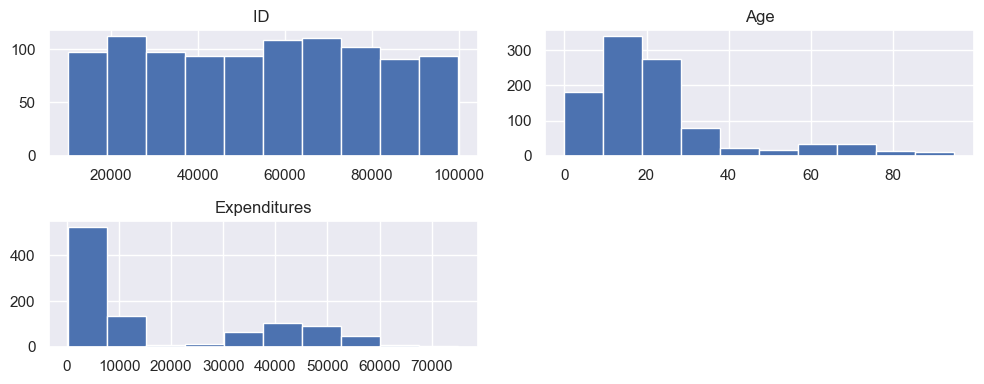

In [28]:
california.hist()
plt.tight_layout()

Quickly investigate the categorial features (more in-depth investigation per feature will follow):

In [8]:
for feature in california.select_dtypes(include=["object"]).columns:
    print(
        f"\nFor the {feature} feature, we have {california[feature].nunique()} categories which are:"
        f"\n\t{sorted(list(california[feature].unique()))}"
    )


For the Age Cohort feature, we have 6 categories which are:
	[' 0 - 5', ' 51 +', '13-17', '18-21', '22-50', '6-12']

For the Gender feature, we have 2 categories which are:
	['Female', 'Male']

For the Ethnicity feature, we have 8 categories which are:
	['American Indian', 'Asian', 'Black', 'Hispanic', 'Multi Race', 'Native Hawaiian', 'Other', 'White not Hispanic']


# Observing the alleged discrimination based on ethnicity

## <a id="hist_expenditures">Histogram of expenditures</a>

First, let us have a look at the histogram of the expenditures (all ethnicities combined):

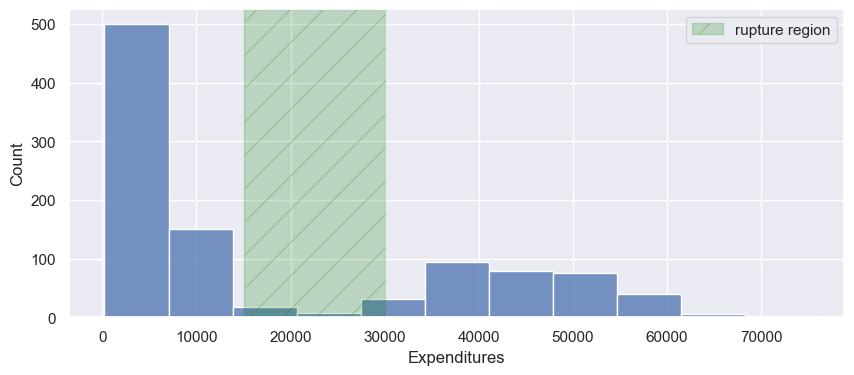

In [24]:
sns.histplot(data=california, x="Expenditures")
plt.axvspan(xmin=15_000, xmax=30_000, color='green', alpha=0.2, hatch="/", label="rupture region")
plt.legend();

_Observation_: There is a "rupture" in this histogram for expenditures between 15,000 and 30,000. How could we explain this rupture?

## Expenditures per ethnicity

Let us go back to our topic of discrimination with regards to the ethnicity:

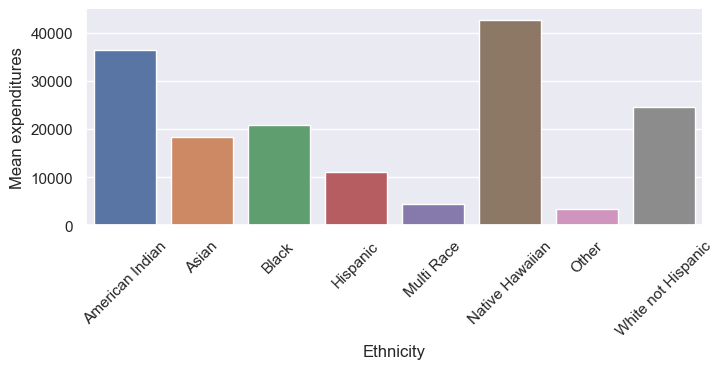

In [25]:
df_gp_ethnicity_mean = (
    california.groupby('Ethnicity')['Expenditures'].mean()
    .reset_index().rename(columns={'Expenditures':'Mean expenditures'})
)
sns.catplot(
    x="Ethnicity", y="Mean expenditures", kind="bar", data=df_gp_ethnicity_mean,
    height=3, aspect=5/2
)
plt.xticks(rotation=45);

_Observation_: On average, White not Hispanic individuals receive more expenditures than Hispanic ones, and the ethnicity groups that receive the most expenditures are American Indian and Native Hawaiian. Hence, there seems to be a discrimination with regards to ethnicity.

Remember that the mean is sensitive to extreme values while the median is robust to them. Let us plot the median values:

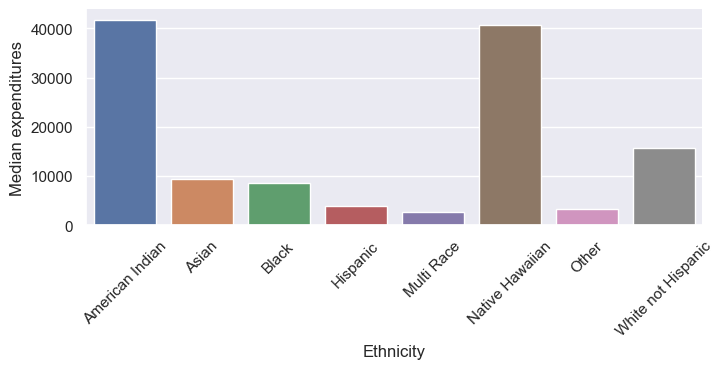

In [26]:
df_gp_ethnicity_median = (
    california.groupby('Ethnicity')['Expenditures'].median()
    .reset_index().rename(columns={'Expenditures':'Median expenditures'})
)
sns.catplot(
    x="Ethnicity", y="Median expenditures", kind="bar", data=df_gp_ethnicity_median,
    height=3, aspect=5/2
)
plt.xticks(rotation=45);

_Observation_: As previously, White not Hispanic people receive more expenditures than Hispanic ones, and the ethnicity groups that receive the most expenditures are American Indian and Native Hawaiian.

Using boxplots and violin plots rather than bar plots is much more informative:

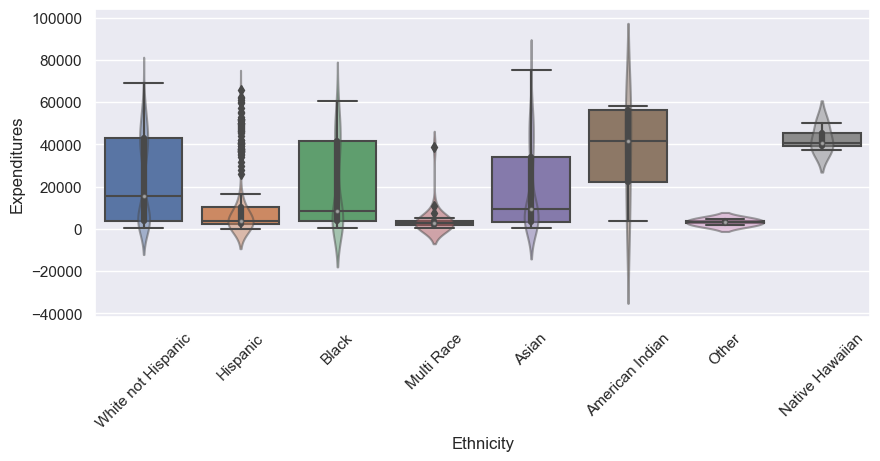

In [27]:
fig, ax = plt.subplots()
sns.boxplot(x=california['Ethnicity'], y=california['Expenditures'])
plt.setp(ax.artists, alpha=.5)
sns.violinplot(x=california['Ethnicity'], y=california['Expenditures'])
plt.setp(ax.collections, alpha=.5)
plt.xticks(rotation=45);

_Observation_: There seems to be a discrimination based on ethnicity.

## Count per ethnicity

However, in the California dataset at hand, we do not have enough individuals from American Indian and Native Hawaiian ethnicities, so it is hard to take them into account as they may not be representative of the whole population of American Indian and Native Hawaiian ethnicites:

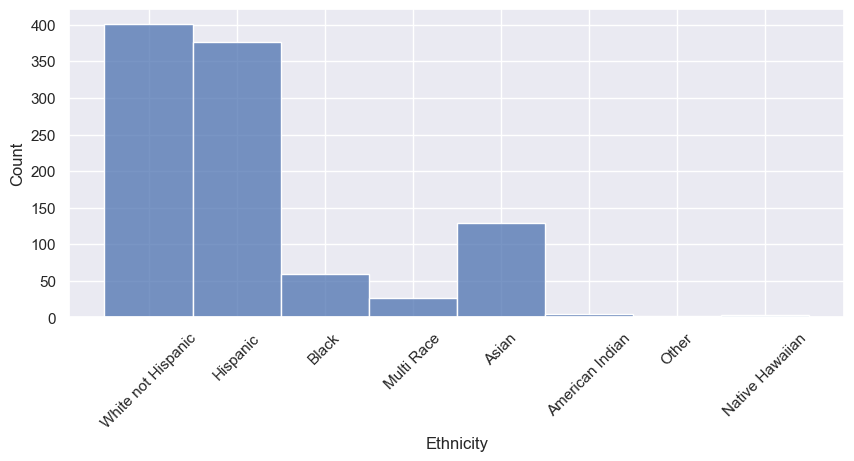

In [12]:
sns.histplot(data=california, x="Ethnicity")
plt.xticks(rotation=45);

Hence, we will only focus on the alleged discrimination privileging the Whites non-Hispanic over the Hispanics.

## seaborn vs plotly

Let us look at the histogram of expenditures per ethnicity.

Using seaborn:

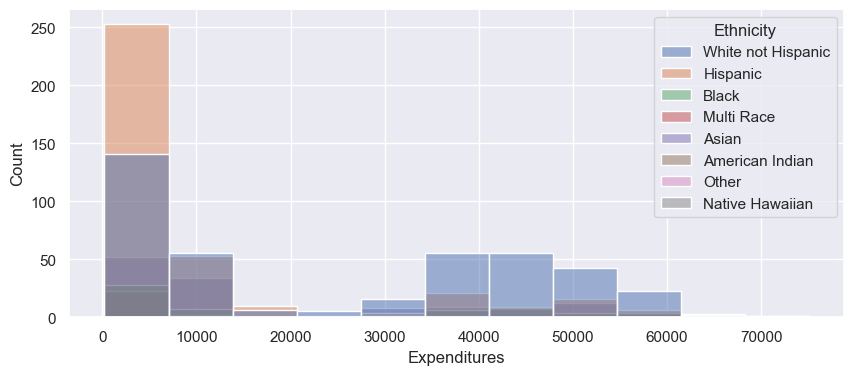

In [32]:
sns.histplot(data=california, x="Expenditures", hue="Ethnicity");

*Osbervations*:
- With just one line of code, the xlabel, ylabel, and legend is automatically displayed (which is not the case of matplotlib, but remember that seaborn is built on top of matplotlib).
- However, we have too many categories to be able to visualize anything clearly.

Using plotly:

In [33]:
fig = px.histogram(california, x="Expenditures", color="Ethnicity")
fig.show()

*Observations*:
- With just one (two) line of code, the xlabel, ylabel, and legend is automatically displayed.
- Plotly is interactive: for example, you can click on the legends in order to only compare _White not Hispanic_ to _Hispanic_:
    - double-click on _White not Hispanic_: it will only display _White not Hispanic_ (and remove all others from the display)
    - click on _Hispanic_: it will add _Hispanic_ to the existing display

Beware:
- Plotly allows interactivity so it seems to be better than seaborn...
- But this interactivity can cause lags especially if you have a lot of plotly figures in your notebook, and your notebook file's memory size increases a lot.
- <mark>Only use plotly instead seaborn when plotly actually adds value.</mark>
- If you must use many plotly figures, in order to avoid lags in your notebook during your "draft phase", you can export your plotly figures as HTML to open them separately from your notebook (use another app than jupyter).

Apart from the ethnicity feature, in the next sections, we are going to look into the other features at hand: age cohort, age and gender.

# Looking into the gender feature

Now, let us look into the gender feature. Is there a discrimination of expenditures with regards to the gender of the individual?

,Gender,Mean expenditures
0,Female,18130.0
1,Male,18001.0


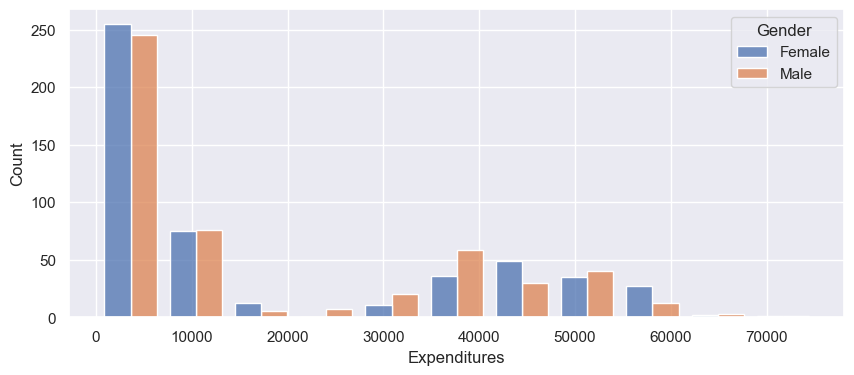

In [34]:
sns.histplot(data=california, x="Expenditures", hue='Gender', multiple="dodge", shrink=.8)

california.groupby('Gender')['Expenditures'].mean()\
    .reset_index().round(0).rename(columns={'Expenditures':'Mean expenditures'})

_Observation_: The gender does not seem to discriminate against the expenditures.

# Looking into the age and age cohort features

Now, let us look at the age feature. Is there a discrimination of expenditures with regards to the age of the individual?

## Age feature

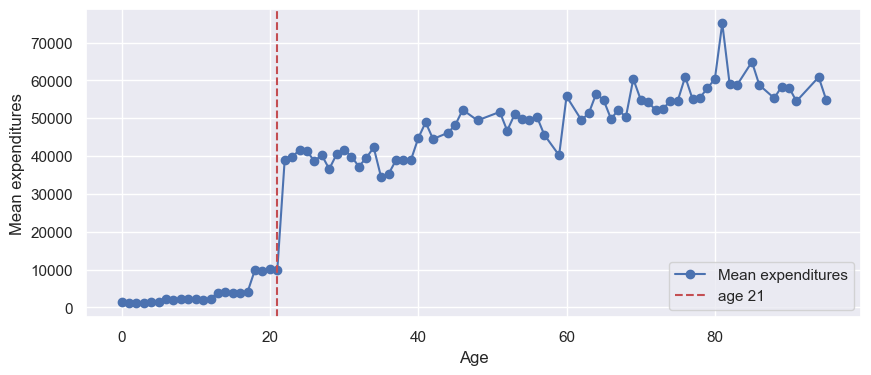

In [35]:
df_gp_age_mean = california.groupby('Age')['Expenditures'].mean()\
    .reset_index().sort_values('Age').rename(columns={'Expenditures':'Mean expenditures'})

plt.plot(df_gp_age_mean['Age'], df_gp_age_mean['Mean expenditures'], '-o', label='Mean expenditures') ;
plt.axvline(x=21, label="age 21", color="r", linestyle="dashed")
plt.xlabel('Age')
plt.ylabel('Mean expenditures')
plt.legend()
plt.show()

In [36]:
df_gp_age_mean['Mean expenditures (%)'] = \
    df_gp_age_mean['Mean expenditures'] / df_gp_age_mean['Mean expenditures'].sum() * 100
df_gp_age_mean_zoom = df_gp_age_mean.query('18 < Age < 25')
display(
    df_gp_age_mean_zoom.style.background_gradient(
        axis=0,
        cmap="YlOrRd",
        subset=['Mean expenditures', 'Mean expenditures (%)']
    ).format(precision=2)
)

,Age,Mean expenditures,Mean expenditures (%)
19,19,9615.79,0.30
20,20,10037.35,0.31
21,21,9863.94,0.30
22,22,39088.28,1.20
23,23,39657.91,1.22
24,24,41715.00,1.28


_Observations_:
- We observe a rupture in expenditures with regards to the age that can explain the rupture in the [histogram of expenditures observed in subsection 3.1](#hist_expenditures)!
- The age seems to be very discriminative with regards to the amount of expenditures!
- We would need <mark>domain experts</mark> to explain this rupture. For example, is the budget for younger individuals (younger than 21) separated from the one considered in our dataset?

Does this discrimination based on the age explain why it is considered that there is a discrimination based on the ethnicity?

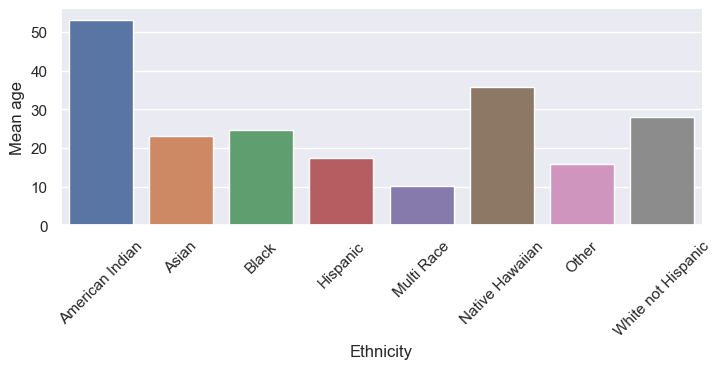

In [37]:
df_gp_ethnicity_age_mean = california.groupby('Ethnicity')['Age'].mean()\
    .reset_index().rename(columns={'Age':'Mean age'})

sns.catplot(x="Ethnicity", y="Mean age", kind="bar", data=df_gp_ethnicity_age_mean,
            height=3, aspect=5/2)
plt.xticks(rotation=45) ;

_Observations:_
- Some ethnicity groups hold individuals that are "much older" than others!
- As a reminder, the ethnicities that have the most expenditures are American Indian, Native Hawaiian and White not Hispanic.
- Here, we can observe that these ethnicities with the highest expenditures are also the ethnicites whose people are older on average.
- Hence, it seems that behind the alleged discrimination on ethnicity was actually hidden the discrimination on age!

## Age cohort feature

Let us confirm our previous insights on the age cohort feature.

First of all, we need to preprocess the age cohort values as we can not sort them:

In [38]:
sorted(california["Age Cohort"].unique())

[' 0 - 5', ' 51 +', '13-17', '18-21', '22-50', '6-12']

Remember that the rupture in expenditures occured between ages 21 and 22. Here, we have the split in the age cohorts: 18-21 and 22-50.

We re-format teh age cohort feature:

In [39]:
california["Age Cohort (cleaned)"] = california["Age Cohort"].str.strip()
california["Age Cohort (cleaned)"].replace({"6-12":"06-12"}, inplace=True)
sorted(california["Age Cohort (cleaned)"].unique())

['0 - 5', '06-12', '13-17', '18-21', '22-50', '51 +']

Now we can plot the histograms of expenditures with regards to the age cohort:

In [40]:
fig = px.histogram(
    california.sort_values(by=["Age Cohort (cleaned)"]),
    x="Expenditures",
    color="Age Cohort (cleaned)",
    color_discrete_sequence=px.colors.sequential.YlOrRd
)
fig.show()

and plot the histogram of ethnicities with regards to the age cohort:

In [41]:
fig = px.histogram(
    california.sort_values(by=["Age Cohort (cleaned)"]),
    x="Ethnicity",
    color="Age Cohort (cleaned)",
    color_discrete_sequence=px.colors.sequential.YlOrRd
)
fig.show()

# Conclusion

In our dataset, it seems that because White not Hispanic individuals are older than Hispanic ones, and that age seems to lead to more expenditures, it may look like being White not Hispanic instead of Hispanic leads to more expenditures (while the true discrimination seems to be based on the age and not the ethnicity itself).

Suppose you were doing a regression in order to predict the expenditures, then you must have the age (or age cohort) feature in your model.

Hence, as Data Scientists, it is always insightful to perform an EDA as a first step when receiving a data set, to understand your data better, thus model it better. You would need to discuss your observations with domain experts.

Note that you can also use this more advanced tool:
- [pandas-profiling](https://pandas-profiling.ydata.ai/docs/master/index.html):
>`pandas-profiling` generates profile reports from a pandas `DataFrame`. The pandas `df.describe()` function is handy yet a little basic for exploratory data analysis. `pandas-profiling` extends pandas `DataFrame` with `df.profile_report()`, which automatically generates a standardized univariate and multivariate report for data understanding.

In [44]:
california.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]